<a href="https://colab.research.google.com/github/BluePhantom-JN/PowerProject/blob/main/PowerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = "/content/drive/MyDrive/GOOGLE DRIVE/household_power_consumption.txt"
import pandas as pd
df = pd.read_csv(path,delimiter=';',dtype=str)
df.isna().sum()
# cleaning the data finding null value

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
df['Sub_metering_3']=df['Sub_metering_3'].fillna(value=0)
df=df.replace('?',0)
df = df.astype({'Global_active_power':float,'Global_reactive_power':float,'Sub_metering_1':float,'Sub_metering_2':float,'Sub_metering_3':float,'Voltage':float,'Global_intensity':float})

In [ ]:
df1=df.copy()
df1['total_power(kw)'] = df['Global_active_power'] + df['Global_reactive_power']
df1['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df1['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [ ]:
df1.info()
# cleaned and nonull value copied to df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   total_power(kw)        float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 158.3+ MB


In [ ]:
# ((((((((((((((((((((((((((((((((((((((((((((((((((((((()))))))))))))))))))))))))))))))))))))))))))))))))))))))

In [ ]:
 path = "/content/drive/MyDrive/Sceaux 2006-12-16 to 2008-05-31.csv"
import pandas as pd
temp = pd.read_csv(path)
temp['datetime'] = pd.to_datetime(temp['datetime'])
temp.rename(columns={'datetime':'Date'},inplace=True)


/tmp/ipython-input-233-3580611074.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  temp['datetime'] = pd.to_datetime(temp['datetime'])


In [ ]:
temp.drop(columns=['name', 'tempmax', 'tempmin', 'feelslikemax',
       'feelslikemin', 'feelslike', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],inplace=True)
# removed filter data kept only needed data

In [ ]:
temp

,Date,temp,dew,humidity
0,2006-12-16,5.7,4.1,89.8
1,2006-12-17,3.4,2.3,92.4
2,2006-12-18,4.0,2.3,89.4
3,2006-12-19,2.3,-1.0,80.1
4,2006-12-20,2.6,-1.8,73.5
...,...,...,...,...
1437,2010-11-22,4.3,1.8,83.5
1438,2010-11-23,4.3,1.6,82.7
1439,2010-11-24,4.9,2.1,82.7
1440,2010-11-25,3.0,0.9,85.7


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1442 non-null   datetime64[ns]
 1   temp      1442 non-null   float64       
 2   dew       1442 non-null   float64       
 3   humidity  1442 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 45.2 KB


In [ ]:
# ((((((((((((((((((((((((((((((((((((((((((((()))))))))))))))))))))))))))))))))))))))))))))

In [ ]:
df2 = df1.groupby('Date')[['Global_active_power', 'Global_reactive_power',
       'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'total_power(kw)']].sum().reset_index()
# grouping by date and adding all the power consumed

In [ ]:
df3=df1.groupby(['Date'])[['Voltage', 'Global_intensity']].mean().reset_index()
# grouping by date and taking mean of volt and amp

In [ ]:
df2 = pd.merge(df2,df3,how='left',on='Date')

In [ ]:
df4 = pd.merge(df2,temp,how='left',on='Date')
df4.fillna(value=0,inplace=True)

In [ ]:
df4.info()
# df4 final merged data of temp and grouped by date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1442 non-null   datetime64[ns]
 1   Global_active_power    1442 non-null   float64       
 2   Global_reactive_power  1442 non-null   float64       
 3   Sub_metering_1         1442 non-null   float64       
 4   Sub_metering_2         1442 non-null   float64       
 5   Sub_metering_3         1442 non-null   float64       
 6   total_power(kw)        1442 non-null   float64       
 7   Voltage                1442 non-null   float64       
 8   Global_intensity       1442 non-null   float64       
 9   temp                   1442 non-null   float64       
 10  dew                    1442 non-null   float64       
 11  humidity               1442 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 135.3 KB


In [ ]:
df4.head()

,Date,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_power(kw),Voltage,Global_intensity,temp,dew,humidity
0,2006-12-16,1209.176,34.922,0.0,546.0,4926.0,1244.098,236.243763,13.082828,5.7,4.1,89.8
1,2006-12-17,3390.460,226.006,2033.0,4187.0,13341.0,3616.466,240.087028,9.999028,3.4,2.3,92.4
2,2006-12-18,2203.826,161.792,1063.0,2621.0,14018.0,2365.618,241.231694,6.421667,4.0,2.3,89.4
3,2006-12-19,1666.194,150.942,839.0,7602.0,6197.0,1817.136,241.999313,4.926389,2.3,-1.0,80.1
4,2006-12-20,2225.748,160.998,0.0,2648.0,14063.0,2386.746,242.308062,6.467361,2.6,-1.8,73.5


In [ ]:
#(((((((((((((((((((((((((((((((( ((((((((((((((((((((((()))))))))))))))))))))))))))))))))))))))))))))))))))))))

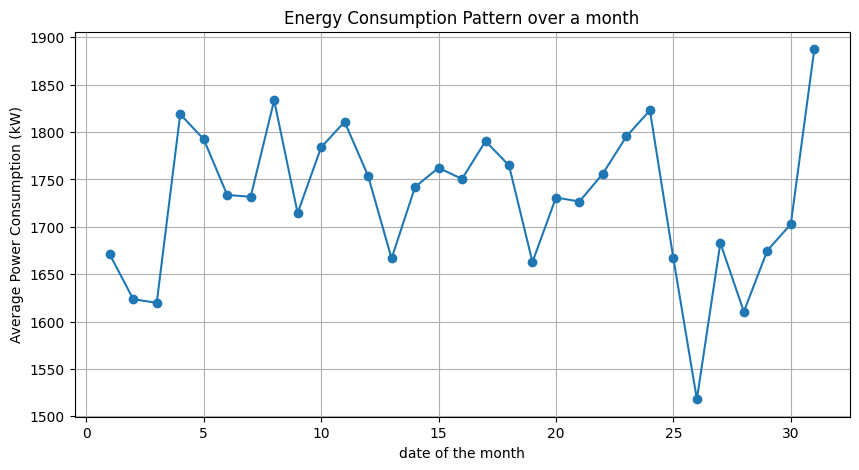

In [ ]:
df4['day'] = df4['Date'].dt.day
hourly_avg = df4.groupby('day')['total_power(kw)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('date of the month')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Energy Consumption Pattern over a month')
plt.grid()
plt.show()
# Demand Forecasting for Energy Providers: Predict demand for better load management and pricing strategies

In [ ]:
df5 = df.copy()
df5['Time'] = pd.to_datetime(df5['Time'], format='%H:%M:%S').dt.time
df5['hour'] = df5['Time'].apply(lambda x:x.hour if pd.notnull(x) else None )
hourly_avg = df5.groupby('hour')['Global_active_power'].mean()

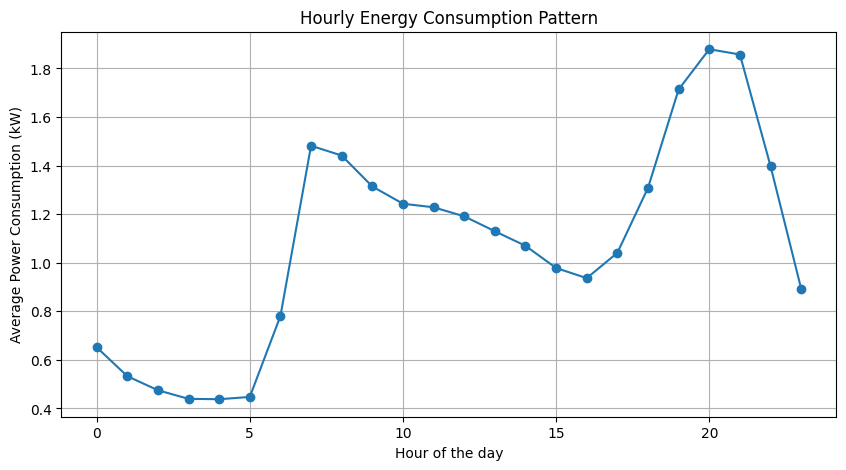

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Hourly Energy Consumption Pattern')
plt.grid()
plt.show()

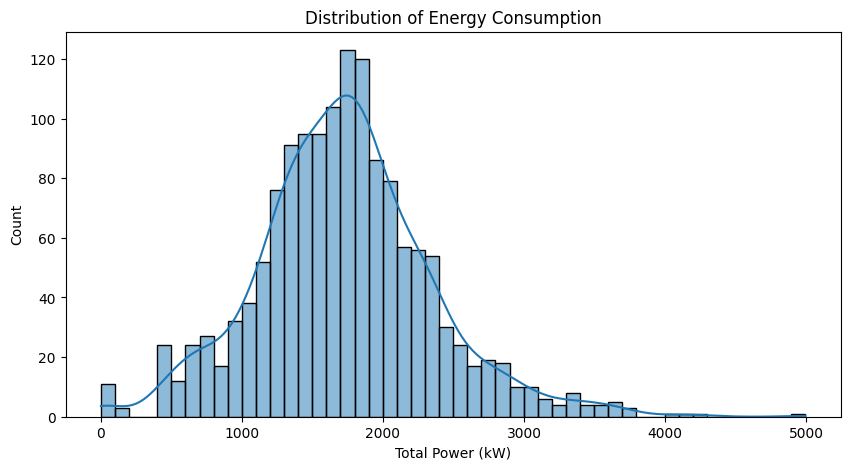

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df4['total_power(kw)'], bins=50, kde=True)
plt.xlabel('Total Power (kW)')
plt.title('Distribution of Energy Consumption')
plt.show()

Text(0.5, 1.0, 'Sub Metering Consumption')

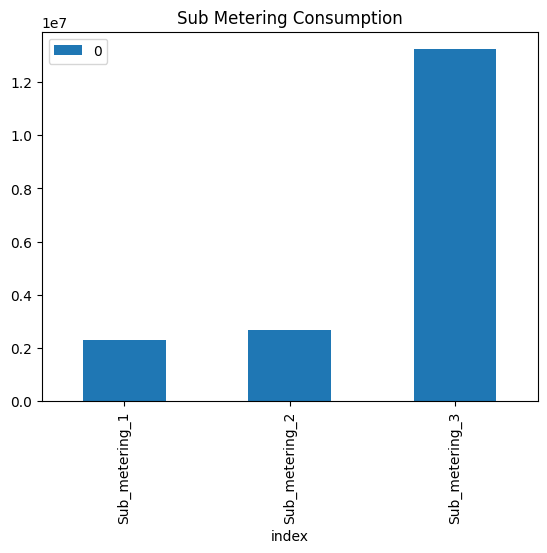

In [ ]:
df2[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].sum().reset_index().plot(kind='bar',x='index')
plt.title("Sub Metering Consumption")
# Energy Management for Households: Monitor energy usage, reduce bills, and promote energy-efficient habits.

In [ ]:
# (((((((((((((((((((((((((((((((((((((((((((((((((())))))))))))))))))))))))))))))))))))))))))))))))))

<Axes: >

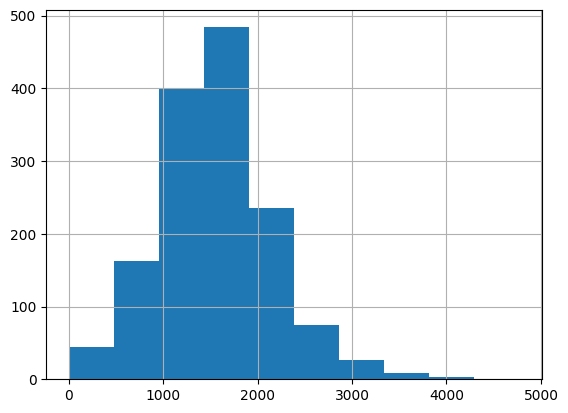

In [ ]:
df4['Global_active_power'].hist()
# std for Global_active_power

<Axes: >

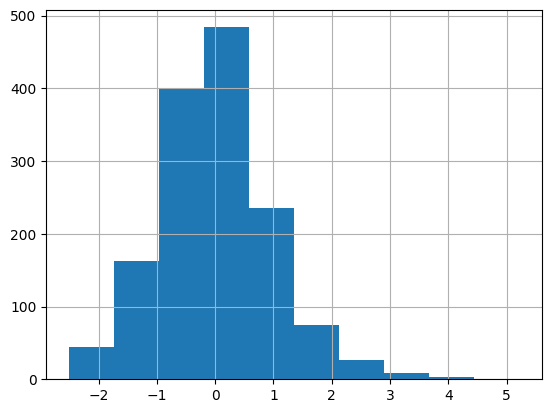

In [ ]:
df4['Global_active_power_std'] = (df4['Global_active_power']-df4['Global_active_power'].mean())/df4['Global_active_power'].std()
df4['Global_active_power_std'].hist()
# Global_active_power std belove 3 may be

<Axes: >

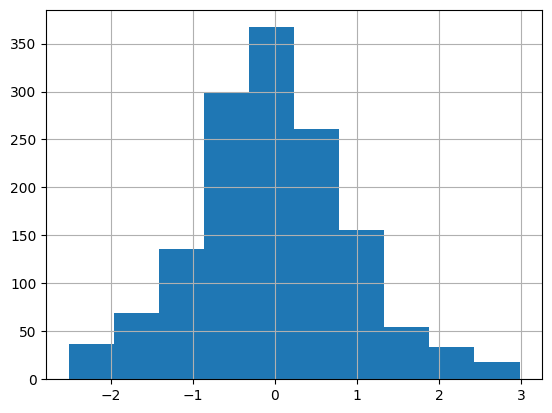

In [ ]:
con  = df4['Global_active_power_std']<=3
df4 = df4[con]
df4['Global_active_power_std'].hist()

<Axes: >

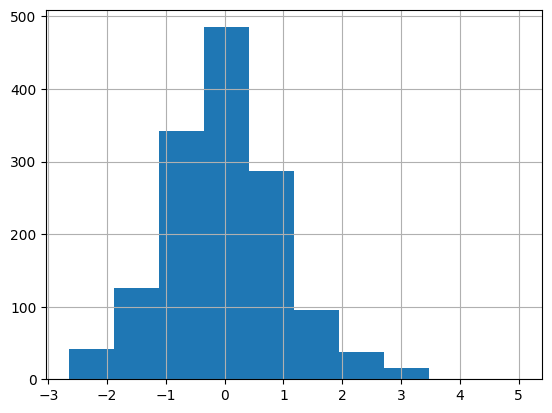

In [ ]:
df4['Global_intensity_std'] = (df4['Global_intensity']-df4['Global_intensity'].mean())/df4['Global_intensity'].std()
df4['Global_intensity_std'].hist()

<Axes: >

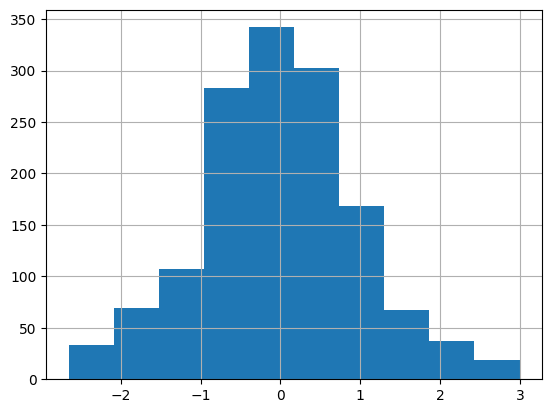

In [ ]:
con = df4['Global_intensity_std']<=3
df4 = df4[con]
df4['Global_intensity_std'].hist()

<Axes: >

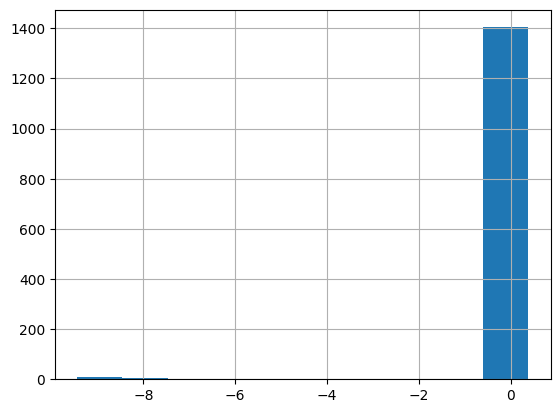

In [ ]:
df4['Voltage_std'] = (df4['Voltage']-df4['Voltage'].mean())/df4['Voltage'].std()
df4['Voltage_std'].hist()

<Axes: >

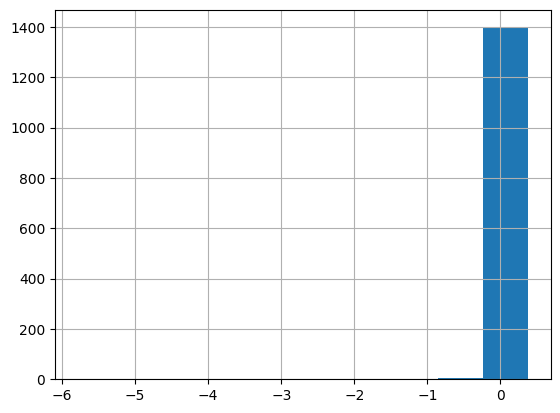

In [ ]:
con = df4['Voltage_std']>=-6
df4 = df4[con]
df4['Voltage_std'].hist()

In [ ]:
df4.head()

,Date,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_power(kw),Voltage,Global_intensity,temp,dew,humidity,day,Global_active_power_std,Global_intensity_std,Voltage_std
2,2006-12-18,2203.826,161.792,1063.0,2621.0,14018.0,2365.618,241.231694,6.421667,4.0,2.3,89.4,18,1.057013,1.111770,0.135844
3,2006-12-19,1666.194,150.942,839.0,7602.0,6197.0,1817.136,241.999313,4.926389,2.3,-1.0,80.1,19,0.186068,0.235188,0.166302
4,2006-12-20,2225.748,160.998,0.0,2648.0,14063.0,2386.746,242.308062,6.467361,2.6,-1.8,73.5,20,1.092526,1.138557,0.178553
5,2006-12-21,1716.624,144.166,1765.0,2623.0,10421.0,1860.790,240.705771,5.026806,4.6,1.0,78.0,21,0.267763,0.294056,0.114977
6,2006-12-22,2341.338,186.906,3151.0,350.0,11131.0,2528.244,241.184549,6.872917,4.7,0.6,75.1,22,1.279778,1.376308,0.133974


In [ ]:
df4.drop(columns=['Global_active_power_std','Global_intensity_std','Voltage_std'],inplace=True)

In [ ]:
df4.corr()

,Date,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_power(kw),Voltage,Global_intensity,temp,dew,humidity,day
Date,1.000000,-0.058879,0.184466,-0.066336,-0.140203,0.196989,-0.042582,0.088793,-0.070426,0.054520,-0.008795,-0.129144,-0.001752
Global_active_power,-0.058879,1.000000,0.028367,0.548146,0.475975,0.753258,0.996266,0.121099,0.999062,-0.554845,-0.466712,0.345421,-0.009521
Global_reactive_power,0.184466,0.028367,1.000000,0.312489,0.171932,0.033908,0.114567,0.067793,0.051113,0.508501,0.429839,-0.295058,-0.000989
Sub_metering_1,-0.066336,0.548146,0.312489,1.000000,0.236232,0.305713,0.571748,-0.000886,0.561839,-0.118816,-0.101133,0.069171,-0.031756
Sub_metering_2,-0.140203,0.475975,0.171932,0.236232,1.000000,0.187067,0.487882,-0.027727,0.486075,-0.111302,-0.063573,0.119496,0.010849
Sub_metering_3,0.196989,0.753258,0.033908,0.305713,0.187067,1.000000,0.751528,0.134842,0.745430,-0.385456,-0.356350,0.175400,-0.005035
total_power(kw),-0.042582,0.996266,0.114567,0.571748,0.487882,0.751528,1.000000,0.126206,0.997299,-0.507492,-0.426698,0.317799,-0.009548
Voltage,0.088793,0.121099,0.067793,-0.000886,-0.027727,0.134842,0.126206,1.000000,0.115604,-0.146350,-0.161578,0.018014,-0.009109
Global_intensity,-0.070426,0.999062,0.051113,0.561839,0.486075,0.745430,0.997299,0.115604,1.000000,-0.532088,-0.444946,0.336666,-0.010978
temp,0.054520,-0.554845,0.508501,-0.118816,-0.111302,-0.385456,-0.507492,-0.146350,-0.532088,1.000000,0.899228,-0.491810,-0.016329


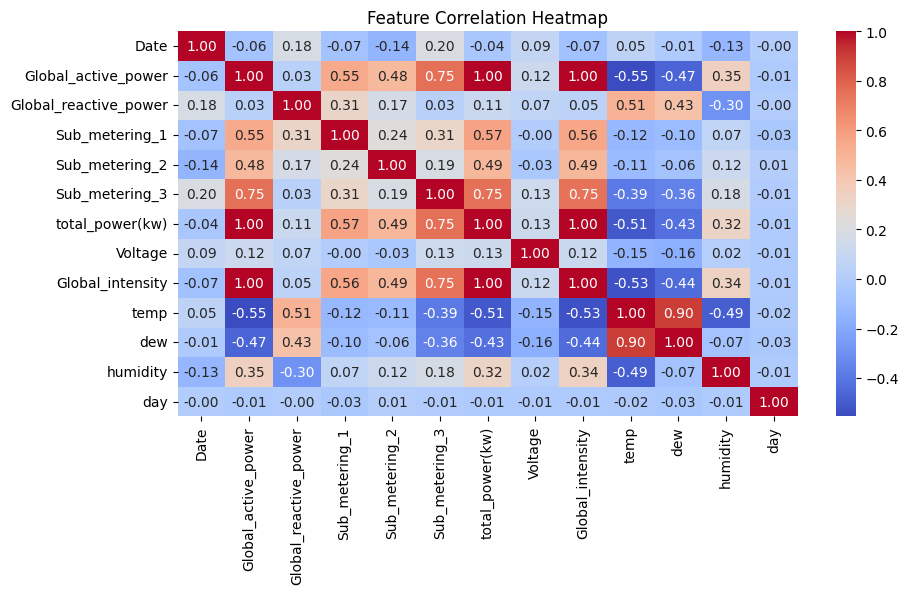

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
# headmap corelation between the features and target

In [ ]:
y = df4['Global_active_power']
x = df4.drop(columns=['Global_active_power','Date','total_power(kw)','day'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]
for model in models:
    print(model)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('r2 score',r2_score(y_pred,y_test))
    print('mse',mean_squared_error(y_pred,y_test))

LinearRegression()
r2 score 0.9991875586675903
mse 277.314588120932
RandomForestRegressor()
r2 score 0.9988482244845789
mse 392.92917716184354
GradientBoostingRegressor()
r2 score 0.9990768871687096
mse 314.65601260321245


In [ ]:
x.shape

(1411, 9)

In [ ]:
from torch import nn
import torch
from torch import tensor,float32
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

x_train,x_test = tensor(x_train.values,dtype=float32),tensor(x_test.values,dtype=float32)
y_train,y_test = tensor(y_train.values,dtype=float32),tensor(y_test.values,dtype=float32)

class Power(nn.Module):
    def __init__(self, input_size, output_size):
        super(Power, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, output_size)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        return x

model=Power(x.shape[1],1)
criterion= nn.L1Loss()

epochs=10000
lrs=[0.0001,0.00001]
for lr in lrs:
  optimizer=torch.optim.Adam(model.parameters(),lr=lr)
  print(lr)
  for epoch in range(epochs):
    pred=model(x_train)
    loss=criterion(pred,y_train.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%5000==0:
      print(f"epoch:{epoch} loss:{loss.item()}")

with torch.no_grad():
    output=model(x_test)
    mse = mean_squared_error(y_test, output)
    r2 = r2_score(y_test, output)
    print("Mean Squared Error:", mse)
    print("R-square:", r2)

0.0001
epoch:0 loss:1723.190673828125
epoch:5000 loss:152.5170440673828
1e-05
epoch:0 loss:131.0045623779297
epoch:5000 loss:129.82933044433594
Mean Squared Error: 59015.10169549806
R-square: 0.8297668691943867
